<a href="https://colab.research.google.com/github/amarjeet4296/DataSciencePortfolio/blob/main/Time_Series_SES_DES_TES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm


import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore") 

In [ ]:
# pip install matplotlib-inline

In [ ]:
pd.set_option('display.max_rows', None)
plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
myntra_sales = pd.read_excel(r"C:\Users\M312865\Downloads\myntrasales.xlsx")
myntra_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
myntra_sales.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [ ]:
# months
myntra_sales.shape

(217, 2)

In [ ]:
# years
216/12

18.0

In [ ]:
myntra_sales

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [ ]:
# set index as date
myntra_sales.set_index('DATE', inplace=True)

myntra_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


In [ ]:
myntra_sales.tail()

,Sales
DATE,
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,16941.0
2019-01-01,12160.0


## Data Preprocessing 

Let's do all the data processing we learnt about in the last lecture
- Setting index as date
- Perform linear interpolation
- Taking care of anomalies by clipping values using quantiles
- Plotting the resultant time series

<AxesSubplot:xlabel='DATE'>

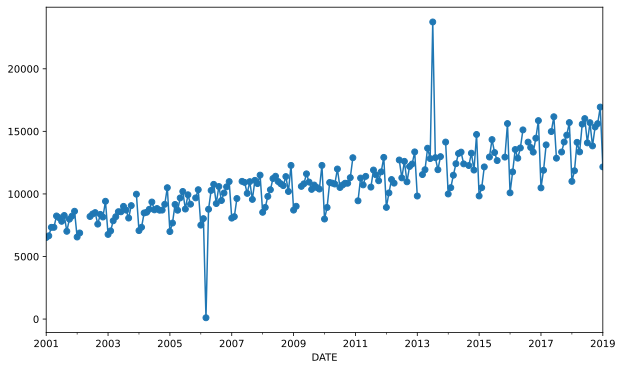

In [ ]:
myntra_sales.Sales.plot(style='-o', figsize=(10,6))

<AxesSubplot:xlabel='DATE'>

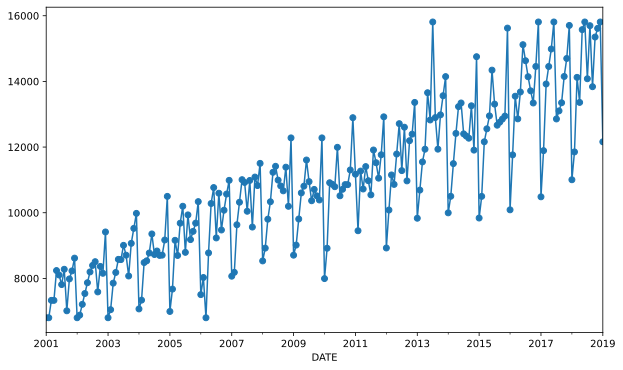

In [ ]:
# linear interpolation 
myntra_sales.Sales = myntra_sales.Sales.interpolate(method = 'linear')

# anomalies - clip quantiles
myntra_sales.Sales = myntra_sales.Sales.clip(upper=myntra_sales.Sales.quantile(0.98), 
                                             lower=myntra_sales.Sales.quantile(0.02))

# plot
myntra_sales.Sales.plot(style='-o', figsize=(10,6))

**Train - test splitting of data**

In [ ]:
train_max_date = myntra_sales.index[-12]
train_max_date

Timestamp('2018-02-01 00:00:00')

In [ ]:
train_max_date = myntra_sales.index[-12]
train_x = myntra_sales.loc[myntra_sales.index < myntra_sales.index[-12]].copy()
test_x = myntra_sales.loc[myntra_sales.index >= myntra_sales.index[-12]].copy()

test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

In [ ]:
# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

## Moving average forecasting

we have already seen how we impute values with moving averages now we want to do a forecast based on that

### How can we do a forecast with moving average

In [ ]:
df = myntra_sales.copy()

In [ ]:
pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 12, freq = 'MS'))

""
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01



- we got the first entry as Jan-2019, which already existed in our series.
- In order to take care of this, we need to explicitly mention that we want values from the second index of the result of `pd.date_range()`
- Hence we utilise slicing by mentioning `[1:]`

In [ ]:
pd.DataFrame(index = pd.date_range(start = df.index[-1], periods = 12, freq = 'MS'))[1:]

""
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01


In [ ]:
df = df.append(pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=13,freq='MS')[1:]))
df.tail(20)

,Sales
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,15809.4
2019-01-01,12160.0
2019-02-01,NaN
2019-03-01,NaN


In [ ]:
df.shape

(229, 1)

In [ ]:
pred = df.Sales.dropna().values 
pred[-3:]

array([15615. , 15809.4, 12160. ])

In [ ]:
pred.shape

(217,)

In [ ]:
df.shape

(229, 1)

In [ ]:
for i in range(12):
    pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([15809.4       , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 15809.4       , 12160.        ,
       14528.13333333, 14165.84444444, 13617.99259259, 14103.99012346,
       13962.6090535 , 13894.86392318, 13987.15436671, 13948.20911446,
       13943.40913479, 13959.59087199, 13950.40304041, 13951.13434906])

So, we can see that we have forecasts here, based on average of last 3 points for all new points.


Now let's plot this.

In [ ]:
df['Pred'] = pred
df

,Sales,Pred
2001-01-01,6802.440000,6802.440000
2001-02-01,6802.440000,6802.440000
2001-03-01,7332.000000,7332.000000
2001-04-01,7332.000000,7332.000000
2001-05-01,8240.000000,8240.000000
2001-06-01,8104.000000,8104.000000
2001-07-01,7813.000000,7813.000000
2001-08-01,8279.000000,8279.000000
2001-09-01,7014.000000,7014.000000
2001-10-01,7985.000000,7985.000000


In [ ]:
df.loc[~df['Sales'].isna(), 'Pred'] = np.nan

In [ ]:
df

,Sales,Pred
2001-01-01,6802.440000,NaN
2001-02-01,6802.440000,NaN
2001-03-01,7332.000000,NaN
2001-04-01,7332.000000,NaN
2001-05-01,8240.000000,NaN
2001-06-01,8104.000000,NaN
2001-07-01,7813.000000,NaN
2001-08-01,8279.000000,NaN
2001-09-01,7014.000000,NaN
2001-10-01,7985.000000,NaN


<AxesSubplot:>

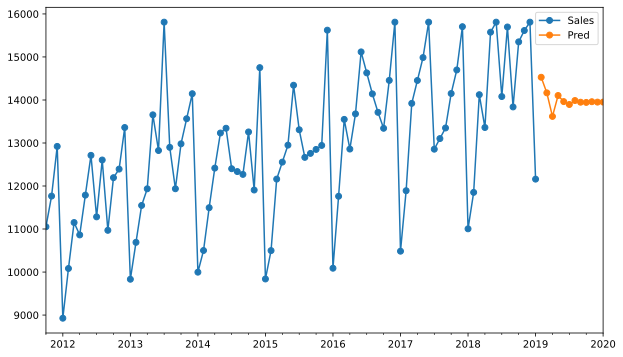

In [ ]:
df.tail(100).plot(style='-o')

> **Q. What would be the performance of the Moving Averages model?**

In [ ]:
df = train_x.copy()

In [ ]:
df.tail()

,Sales
DATE,
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0
2017-12-01,15704.0
2018-01-01,11005.0


In [ ]:
df = df.append(pd.DataFrame(index = pd.date_range(start = df.index[-1], periods=12,freq='MS')[1:]))

In [ ]:
df

,Sales
2001-01-01,6802.440000
2001-02-01,6802.440000
2001-03-01,7332.000000
2001-04-01,7332.000000
2001-05-01,8240.000000
2001-06-01,8104.000000
2001-07-01,7813.000000
2001-08-01,8279.000000
2001-09-01,7014.000000
2001-10-01,7985.000000


In [ ]:
pred = df.Sales.dropna().values 

In [ ]:
pred[-3:]

array([14698., 15704., 11005.])

In [ ]:
for i in range(12):
    pred = np.append(pred, pred[-3:].mean())

In [ ]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15809.4
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [ ]:
test_x['pred'] = pred[-12:]

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,13802.333333
2018-03-01,14123.0,13503.777778
2018-04-01,13360.0,12770.370370
2018-05-01,15576.0,13358.827160
2018-06-01,15809.4,13210.991770
2018-07-01,14080.0,13113.396433
2018-08-01,15697.0,13227.738455
2018-09-01,13838.0,13184.042219
2018-10-01,15351.0,13175.059036


MAE : 1692.467
RMSE : 1875.03
MAPE: 0.115


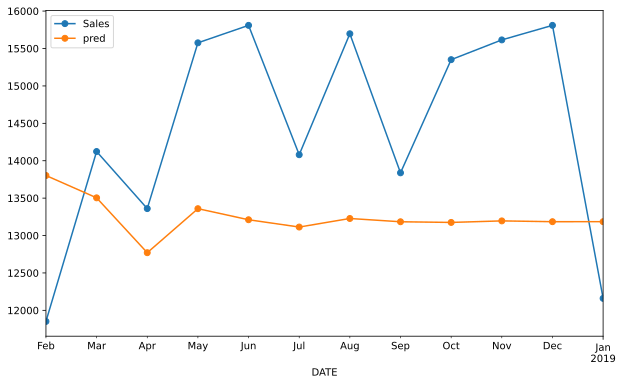

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

# Simple exponential smoothing 

In [ ]:
myntra_sales

,Sales
DATE,
2001-01-01,6802.440000
2001-02-01,6802.440000
2001-03-01,7332.000000
2001-04-01,7332.000000
2001-05-01,8240.000000
2001-06-01,8104.000000
2001-07-01,7813.000000
2001-08-01,8279.000000
2001-09-01,7014.000000


In [ ]:
sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=0.8).fittedvalues

DATE
2001-01-01     6825.773333
2001-02-01     6807.106667
2001-03-01     6803.373333
2001-04-01     7226.274667
2001-05-01     7310.854933
2001-06-01     8054.170987
2001-07-01     8094.034197
2001-08-01     7869.206839
2001-09-01     8197.041368
2001-10-01     7250.608274
2001-11-01     7838.121655
2001-12-01     8150.824331
2002-01-01     8524.564866
2002-02-01     7146.864973
2002-03-01     6934.972995
2002-04-01     7155.794599
2002-05-01     7463.158920
2002-06-01     7787.831784
2002-07-01     8115.966357
2002-08-01     8339.993271
2002-09-01     8475.998654
2002-10-01     7766.399731
2002-11-01     8246.079946
2002-12-01     8174.015989
2003-01-01     9166.803198
2003-02-01     7275.312640
2003-03-01     7093.462528
2003-04-01     7703.492506
2003-05-01     8085.498501
2003-06-01     8481.899700
2003-07-01     8554.779940
2003-08-01     8917.355988
2003-09-01     8749.871198
2003-10-01     8209.174240
2003-11-01     8896.234848
2003-12-01     9398.846970
2004-01-01     9864.569

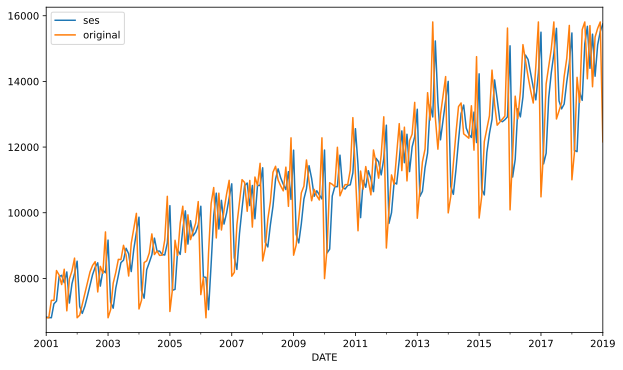

In [ ]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=0.8).fittedvalues)

model.plot(label = 'ses')
myntra_sales.Sales.plot(label = 'original')
plt.legend()

In [ ]:
1/(2*12)

0.041666666666666664

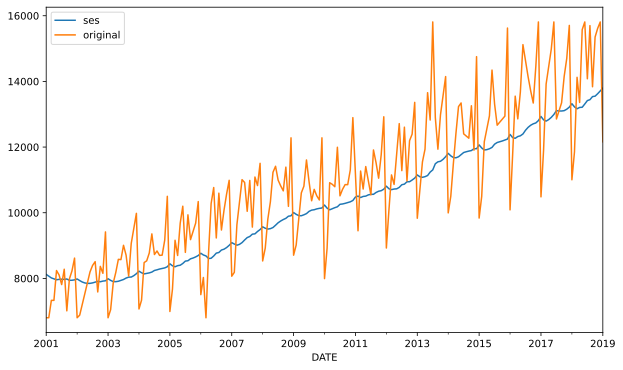

In [ ]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=1/(2*12)).fittedvalues)

model.plot(label='ses')
myntra_sales.Sales.plot(label='original')
plt.legend()

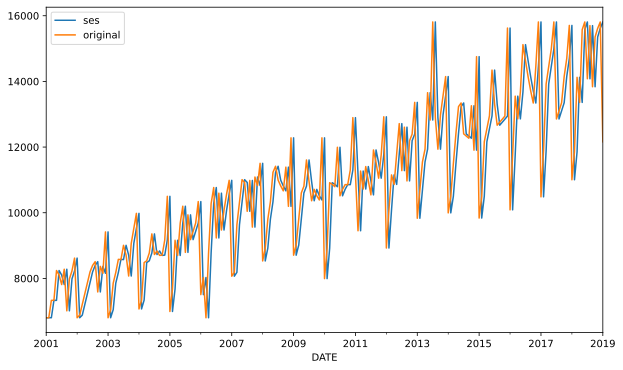

In [ ]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=1).fittedvalues)

model.plot(label='ses')
myntra_sales.Sales.plot(label='original')
plt.legend()

**Q. How can we make future forecasts from this method?**

In [ ]:
model = sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=1/(2*12))
pred = model.forecast(steps = 12)

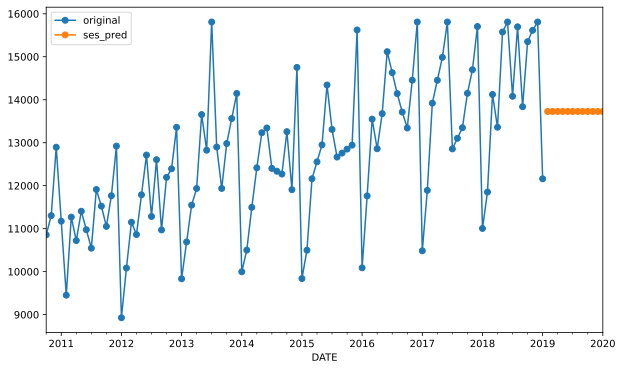

In [ ]:
myntra_sales.Sales.tail(100).plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')

plt.legend()

In [ ]:
## Check performance

MAE : 1621.347
RMSE : 1830.599
MAPE: 0.109


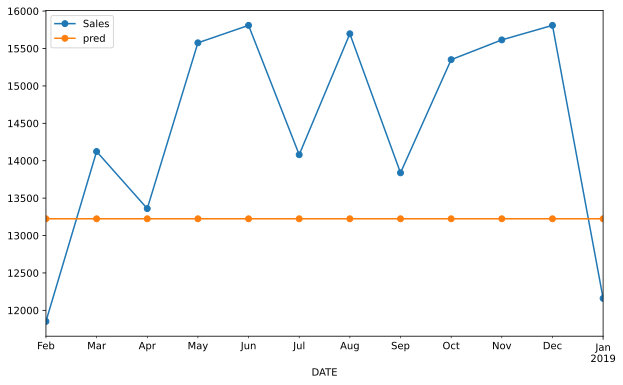

In [ ]:
model = sm.tsa.SimpleExpSmoothing(train_x.Sales).fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,13223.830102
2018-03-01,14123.0,13223.830102
2018-04-01,13360.0,13223.830102
2018-05-01,15576.0,13223.830102
2018-06-01,15809.4,13223.830102
2018-07-01,14080.0,13223.830102
2018-08-01,15697.0,13223.830102
2018-09-01,13838.0,13223.830102
2018-10-01,15351.0,13223.830102


# Double Exponential smoothing (Holt's method)

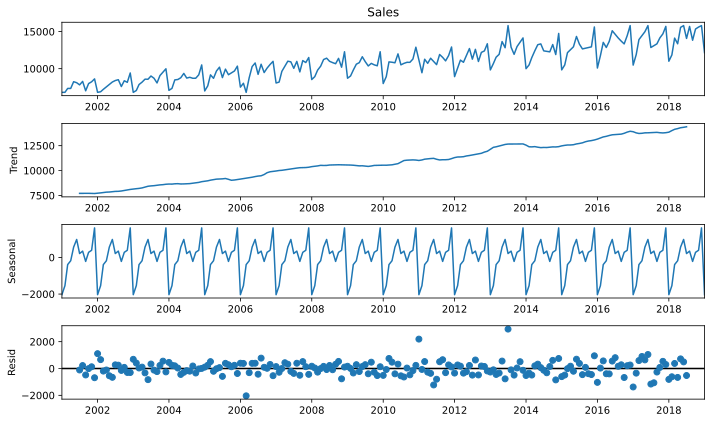

In [ ]:
model = sm.tsa.seasonal_decompose(myntra_sales.Sales, model='additive')
model.plot();

In [ ]:
model = sm.tsa.ExponentialSmoothing(myntra_sales.Sales, trend='add')


In [ ]:
model.fit()

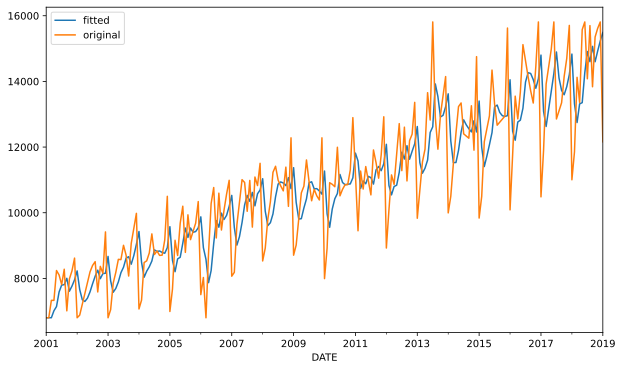

In [ ]:
model = sm.tsa.ExponentialSmoothing(myntra_sales.Sales, trend='add').fit(smoothing_level=0.4)
model.fittedvalues.plot(label='fitted')
myntra_sales.Sales.plot(label='original')
plt.legend()

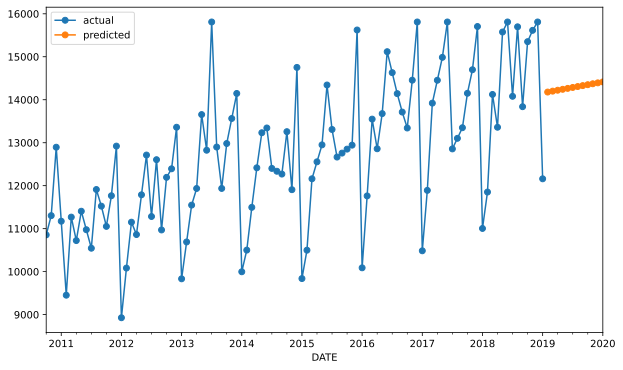

In [ ]:
pred = model.forecast(steps = 12)
myntra_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

MAE : 1167.416
RMSE : 1355.673
MAPE: 0.083


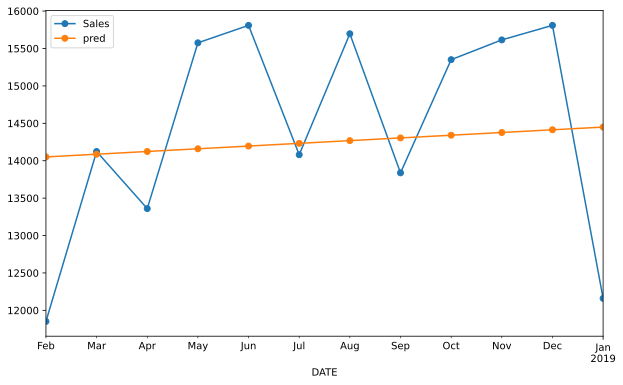

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

# Triple Exponential smoothing (aka Holt-Winters Method)

<AxesSubplot:xlabel='DATE'>

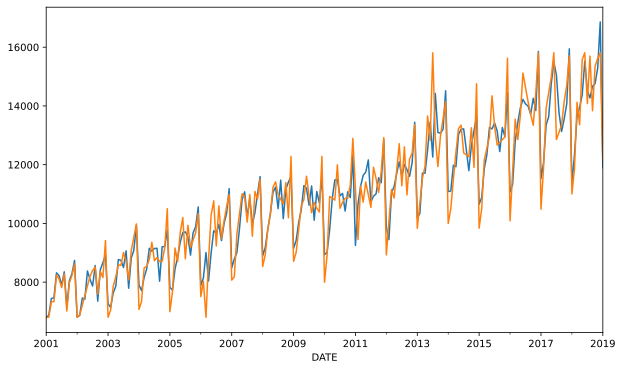

In [ ]:
model = sm.tsa.ExponentialSmoothing(myntra_sales.Sales, trend='add', seasonal='add').fit(smoothing_level=0.4)
model.fittedvalues.plot()
myntra_sales.Sales.plot()

<AxesSubplot:xlabel='DATE'>

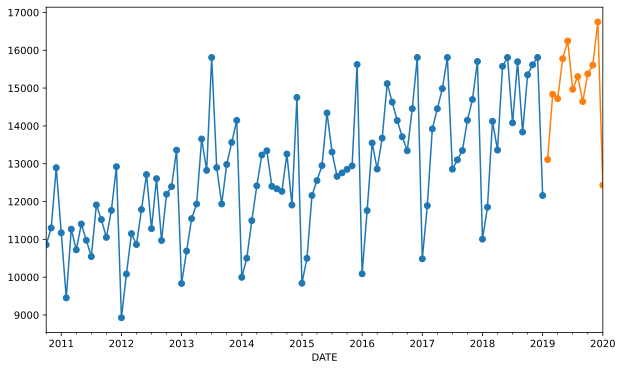

In [ ]:
pred = model.forecast(steps = 12)
myntra_sales.Sales.tail(100).plot(style='-o')
pred.plot(style='-o')

MAE : 588.486
RMSE : 680.401
MAPE: 0.04


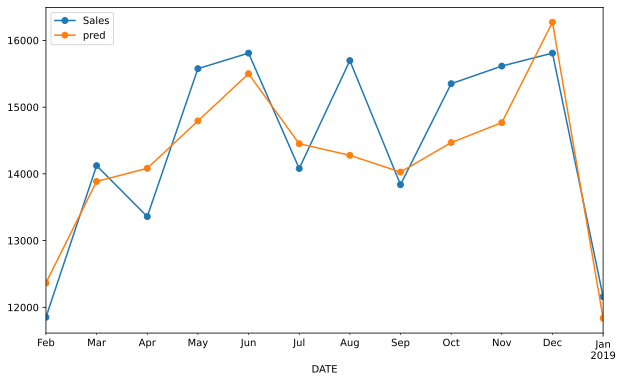

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add', seasonal='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

### Dickey-Fuller Test

In [ ]:
# H0 : Not stationary
# HA : Stationary
# alpha = 0.05

In [ ]:
sm.tsa.stattools.adfuller(myntra_sales.Sales)[1]

0.9789233920172064

In [ ]:
def adf_test(dataset):
    pvalue = sm.tsa.stattools.adfuller(dataset)[1] 
    if pvalue <= 0.05:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')


In [ ]:
adf_test(myntra_sales.Sales)

Sequence is not stationary


<AxesSubplot:xlabel='DATE'>

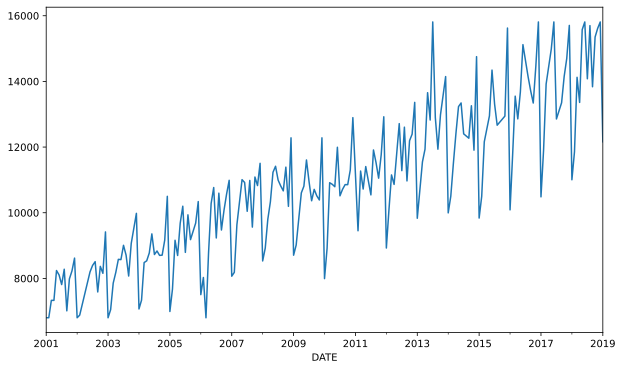

In [ ]:
myntra_sales.Sales.plot()

In [ ]:
myntra_sales.Sales.head()

DATE
2001-01-01    6802.44
2001-02-01    6802.44
2001-03-01    7332.00
2001-04-01    7332.00
2001-05-01    8240.00
Name: Sales, dtype: float64

In [ ]:
# 7332-6827.8992

In [ ]:
# myntra_sales.Sales.diff().head()

<AxesSubplot:xlabel='DATE'>

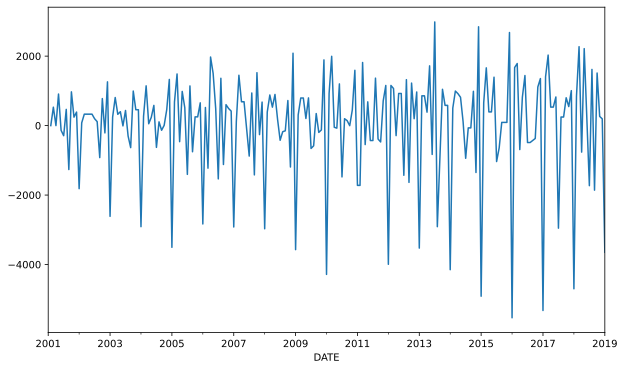

In [ ]:
detrend = myntra_sales.Sales.diff(1)
detrend.plot()

In [ ]:
detrend

DATE
2001-01-01            NaN
2001-02-01       0.000000
2001-03-01     529.560000
2001-04-01       0.000000
2001-05-01     908.000000
2001-06-01    -136.000000
2001-07-01    -291.000000
2001-08-01     466.000000
2001-09-01   -1265.000000
2001-10-01     971.000000
2001-11-01     244.000000
2001-12-01     389.000000
2002-01-01   -1815.560000
2002-02-01      79.560000
2002-03-01     329.000000
2002-04-01     329.000000
2002-05-01     329.000000
2002-06-01     329.000000
2002-07-01     198.000000
2002-08-01     114.000000
2002-09-01    -921.000000
2002-10-01     777.000000
2002-11-01    -210.000000
2002-12-01    1259.000000
2003-01-01   -2612.560000
2003-02-01     245.560000
2003-03-01     808.000000
2003-04-01     325.000000
2003-05-01     400.000000
2003-06-01      -8.000000
2003-07-01     435.000000
2003-08-01    -300.000000
2003-09-01    -634.000000
2003-10-01     994.000000
2003-11-01     456.500000
2003-12-01     456.500000
2004-01-01   -2910.000000
2004-02-01     268.000000
2004-03

### De-seasonalising

<AxesSubplot:xlabel='DATE'>

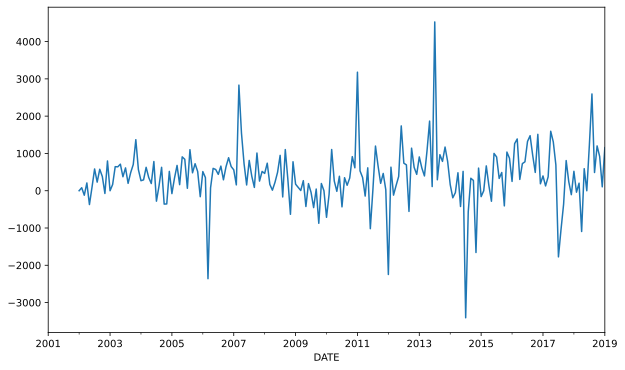

In [ ]:
deseas = myntra_sales.Sales.diff(12)
deseas.plot()

<AxesSubplot:xlabel='DATE'>

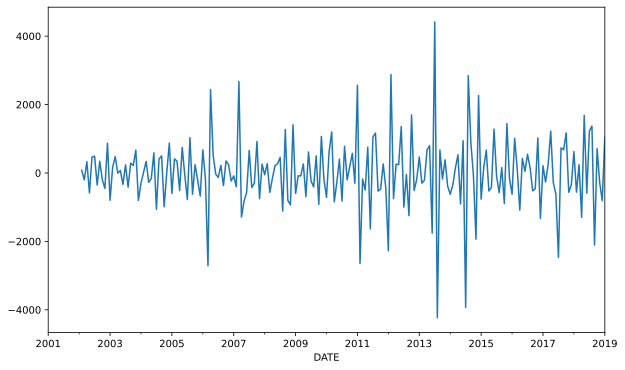

In [ ]:
stationary = myntra_sales.Sales.diff(1).diff(12)
stationary.plot()

In [ ]:
adf_test(stationary.dropna())

Sequence is stationary


# AutoCorrelation and PartialAutoCorrelation

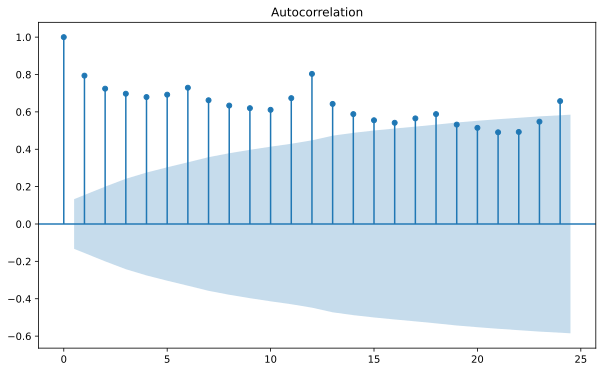

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(myntra_sales.Sales);

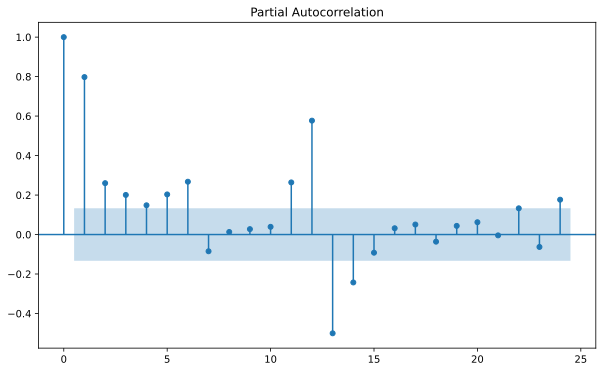

In [ ]:
plot_pacf(myntra_sales.Sales);

## 1. Auto Regression (AR)

In [ ]:
train_x.tail()

,Sales
DATE,
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0
2017-12-01,15704.0
2018-01-01,11005.0


In [ ]:
def adf_test(dataset):
    pvalue = sm.tsa.stattools.adfuller(dataset)[1]
    if pvalue <= 0.05:
      print('Sequence is stationary')
    else:
      print('Sequence is not stationary')

adf_test(train_x.Sales)

Sequence is not stationary


In [ ]:
train_x_st = train_x.copy()
train_x_st.Sales = train_x_st.Sales.diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st.Sales)

Sequence is stationary


In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# AR(p)

# MA(q)
# ARIMA(p, d, q)
# SARIMA (p, d, q) (P, D, Q, s)

In [ ]:
model = SARIMAX(train_x_st.Sales, order = (1, 0, 0)) 

model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

test_x['pred']

DATE
2018-02-01    1728.700558
2018-03-01    -635.966295
2018-04-01     233.963671
2018-05-01     -86.072170
2018-06-01      31.664824
2018-07-01     -11.649074
2018-08-01       4.285542
2018-09-01      -1.576595
2018-10-01       0.580009
2018-11-01      -0.213378
2018-12-01       0.078499
2019-01-01      -0.028879
Name: pred, dtype: float64

<AxesSubplot:xlabel='DATE'>

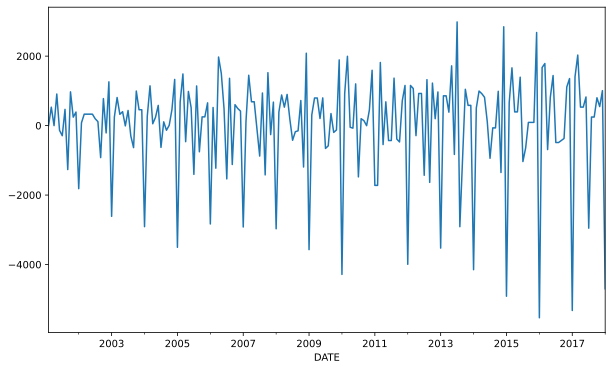

In [ ]:
## predicting
train_x_st.Sales.plot()

<AxesSubplot:xlabel='DATE'>

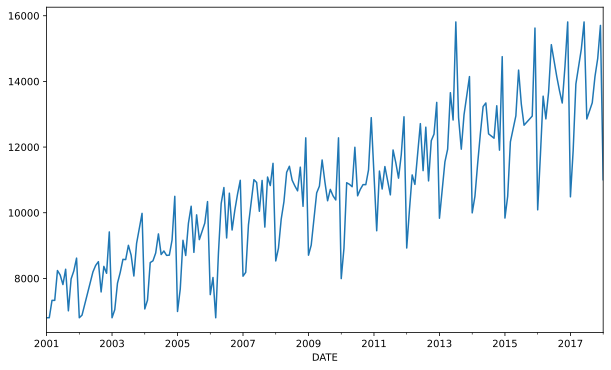

In [ ]:
## predicting
train_x.Sales.plot()

In [ ]:
(np.array([-5,10,15,-10])).cumsum()

array([-5,  5, 20, 10], dtype=int32)

In [ ]:
test_x['pred']

DATE
2018-02-01    1728.700558
2018-03-01    -635.966295
2018-04-01     233.963671
2018-05-01     -86.072170
2018-06-01      31.664824
2018-07-01     -11.649074
2018-08-01       4.285542
2018-09-01      -1.576595
2018-10-01       0.580009
2018-11-01      -0.213378
2018-12-01       0.078499
2019-01-01      -0.028879
Name: pred, dtype: float64

In [ ]:
train_x.Sales[-1] + test_x['pred'].cumsum()

DATE
2018-02-01    12733.700558
2018-03-01    12097.734263
2018-04-01    12331.697934
2018-05-01    12245.625763
2018-06-01    12277.290588
2018-07-01    12265.641514
2018-08-01    12269.927055
2018-09-01    12268.350461
2018-10-01    12268.930469
2018-11-01    12268.717092
2018-12-01    12268.795590
2019-01-01    12268.766712
Name: pred, dtype: float64

In [ ]:
# Integrate !!

test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

MAE : 2307.213
RMSE : 2585.999
MAPE: 0.153


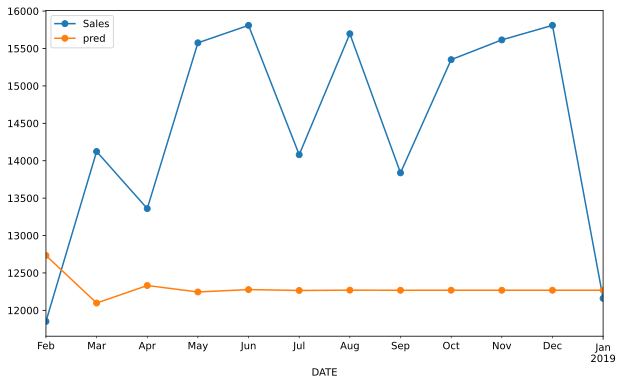

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])